In [1]:
from qiskit import QuantumCircuit
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2, RealAmplitudes, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import COBYLA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import clear_output

In [13]:
wine = load_wine()

X = wine['data']
Y = wine['target']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)



In [14]:
num_qubits = X.shape[1]
MAXITR = 200
opt = COBYLA(maxiter=MAXITR)

In [15]:
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [16]:
featuremap = ZZFeatureMap(feature_dimension=num_qubits, parameter_prefix='x', reps=1)
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)

In [17]:
qc = QuantumCircuit(num_qubits)
qc.compose(featuremap, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.decompose().draw(output='mpl', style='iqx', scale=2)

In [18]:
seed = algorithm_globals.random_seed
initial_weights = algorithm_globals.random.random(ansatz.num_parameters)

/tmp/ipykernel_2764/3680567682.py:1: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  seed = algorithm_globals.random_seed
/tmp/ipykernel_2764/3680567682.py:2: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  initial_weights = algorithm_glob

In [19]:
vqc = VQC(
    optimizer=opt,
    ansatz=ansatz,
    feature_map=featuremap,
    initial_point=initial_weights,
    callback=callback_graph,
    loss='cross_entropy'
)

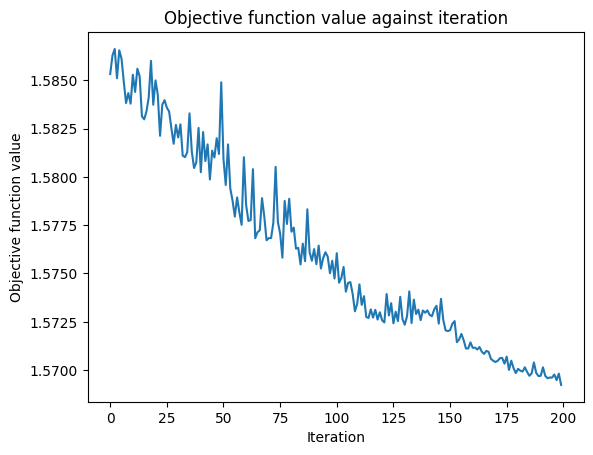

In [20]:
vqc.fit(X_train, Y_train)

In [21]:
scores.append(vqc.score(X_test,Y_test))

In [22]:
print(scores) 

[0.2777777777777778, 0.4444444444444444]


In [ ]:
wine = load_wine()

X = wine['data']
Y = wine['target']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

num_qubits = X.shape[1]
MAXITR = 200
opt = COBYLA(maxiter=MAXITR)

objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    
featuremap = EfficientSU2(num_qubits=num_qubits, parameter_prefix='x', reps=0)

ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3, entanglement="linear")




seed = algorithm_globals.random_seed
initial_weights = algorithm_globals.random.random(ansatz.num_parameters)

vqc = VQC(
    optimizer=opt,
    ansatz=ansatz,
    feature_map=featuremap,
    initial_point=initial_weights,
    callback=callback_graph,
    loss='cross_entropy'
)

scores.append(vqc.score(X_test,Y_test))


print(scores)



In [33]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

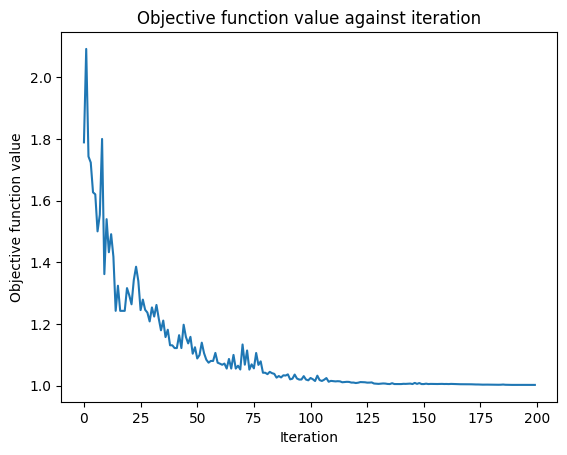

[0.2777777777777778, 0.4444444444444444, 0.5555555555555556, 0.8333333333333334, 0.75, 0.7222222222222222, 0.5277777777777778, 0.4722222222222222, 0.8333333333333334, 0.7777777777777778, 0.4444444444444444, 0.7777777777777778, 0.5833333333333334, 0.4444444444444444, 0.4444444444444444, 0.6944444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.7777777777777778, 0.75, 0.7777777777777778, 0.6666666666666666, 0.7222222222222222, 0.75, 0.75, 0.75, 0.6666666666666666, 0.7222222222222222, 0.75, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.6111111111111112, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.75, 0.75, 0.7777777777777778, 0.7777777777777778, 0.5833333333333334, 0.75, 0.8888888888888888, 0.6388888888888888, 0.9166666666666666, 0.6111111111111112, 0.8055555555555556, 0.7777777777777778, 0.8611111111111112, 0.75, 0.7222222222222222, 0.8333333333333334, 0.7777777777777778, 0.75, 0.8611111111111112, 0.8333333333333334, 0.77777777777

In [237]:
wine = load_wine()

X = wine['data']
Y = wine['target']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)



rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Identify the index of the least important feature
least_important_index = np.argmin(feature_importances)

# Remove the least important feature from both X_train and X_test
X_train = np.delete(X_train, least_important_index, axis=1)
X_test = np.delete(X_test, least_important_index, axis=1)

num_qubits = X.shape[1]//4
MAXITR = 200
opt = COBYLA(maxiter=MAXITR)

objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    
featuremap = EfficientSU2(num_qubits=num_qubits, parameter_prefix='x', reps=1, entanglement='full')

ansatz = TwoLocal(num_qubits=num_qubits, entanglement='linear', entanglement_blocks='cx', rotation_blocks=['ry', 'rz'], reps=2)  

# ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3, entanglement="linear")

# qc = QuantumCircuit(num_qubits)
# qc.compose(featuremap, inplace=True)
# qc.barrier()
# qc.compose(ansatz, inplace=True)
# qc.decompose().draw(output='mpl', style='iqx', scale=2)

seed = algorithm_globals.random_seed
initial_weights = algorithm_globals.random.random(ansatz.num_parameters)

vqc = VQC(
    optimizer=opt,
    ansatz=ansatz,
    feature_map=featuremap,
    initial_point=initial_weights,
    callback=callback_graph,
    loss='cross_entropy'
)

vqc.fit(X_train, Y_train)

scores.append(vqc.score(X_test,Y_test))


print(scores)




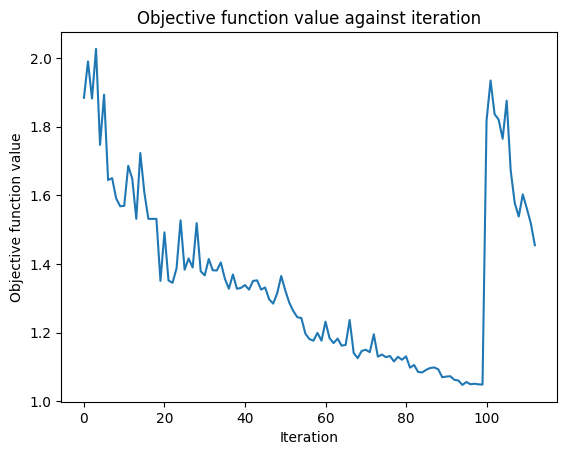

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

In [201]:
seed = algorithm_globals.random_seed
initial_weights = algorithm_globals.random.random(ansatz.num_parameters)

vqc = VQC(
    optimizer=opt,
    ansatz=ansatz,
    feature_map=featuremap,
    initial_point=initial_weights,
    callback=callback_graph,
    loss='cross_entropy'
)

vqc.fit(X_train, Y_train)

scores.append(vqc.score(X_test,Y_test))


print(scores)


In [10]:
scores = []